In [ ]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("saramah/loan-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-data' dataset.
Path to dataset files: /kaggle/input/loan-data


In [ ]:
loans = pd.read_csv('/content/loan_data.csv')

In [ ]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
#EDA
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans = loans.drop(columns = 'credit.policy')
loans

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
ohc_loans = pd.get_dummies(loans, columns=['purpose'], drop_first = False)
ohc_loans

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,True,False,False,False,False,False,False
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,True,False,False,False,False,False,False
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,False,True,False,False,False,False
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,False,True,False,False


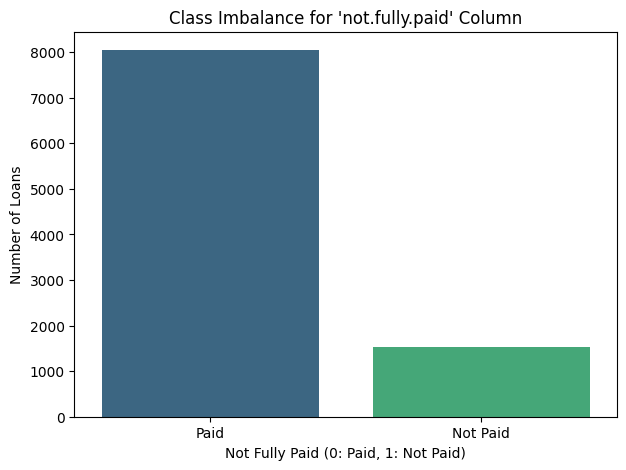

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for 'not.fully.paid'
class_counts = ohc_loans['not.fully.paid'].value_counts()

# Create a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', legend=False)
plt.title('Class Imbalance for \'not.fully.paid\' Column')
plt.xlabel('Not Fully Paid (0: Paid, 1: Not Paid)')
plt.ylabel('Number of Loans')
plt.xticks(ticks=[0, 1], labels=['Paid', 'Not Paid'])
plt.show()

In [ ]:
ohc_loans.groupby("not.fully.paid").mean()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
not.fully.paid,,,,,,,,,,,,,,,,,,
0,0.120770,314.574123,10.941091,12.494413,713.326911,4592.632624,16122.724425,45.759608,1.433934,0.161591,0.056557,0.241641,0.138720,0.416905,0.034058,0.064885,0.048229,0.055562
1,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324,0.252446,0.095238,0.393346,0.045010,0.069798,0.031963,0.112198


<Axes: >

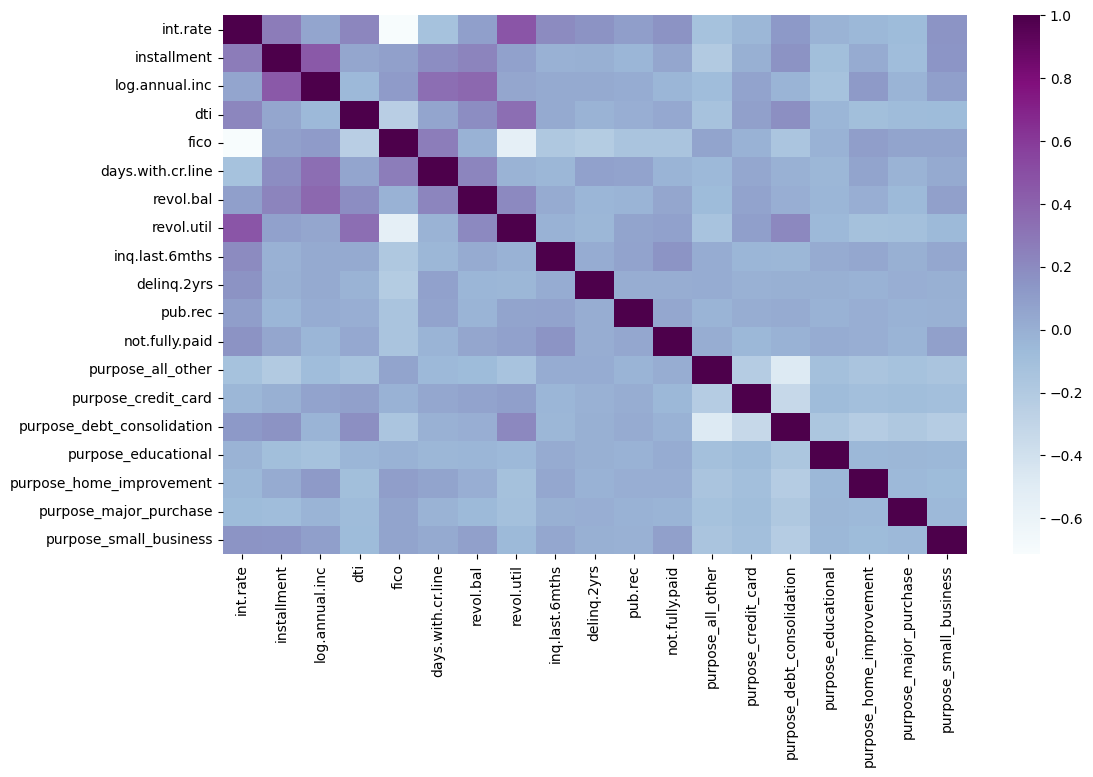

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(ohc_loans.corr(), cmap='BuPu')

Text(0, 0.5, 'Frequency')

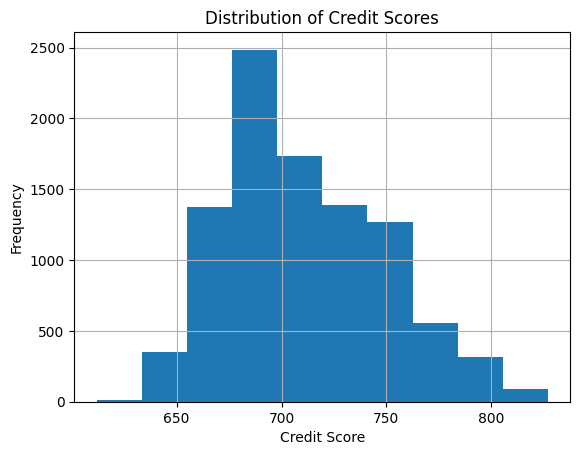

In [ ]:
#Histogram of Credit Scores
ohc_loans.fico.hist()
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
y = ohc_loans['not.fully.paid']
X = ohc_loans.drop('not.fully.paid', axis = 1)
X

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,False,True,False,False,False,False
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False,True,False,False,False,False,False
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,False,True,False,False,False,False
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,False,True,False,False,False,False
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,True,False,False,False,False,False,False
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,True,False,False,False,False,False,False
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,False,False,True,False,False,False,False
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,False,False,False,False,True,False,False


In [ ]:
model = LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X,y)

0.8398413029860096

In [ ]:
y.mean()

np.float64(0.16005429108373356)

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,int.rate,[0.0009765855309117387]
1,installment,[0.0005168549134955849]
2,log.annual.inc,[0.00307946817919603]
3,dti,[0.01216973538154271]
4,fico,[-0.003256312094879094]
5,days.with.cr.line,[-2.885144623514735e-05]
6,revol.bal,[2.1938977932680468e-06]
7,revol.util,[0.0036314242779137795]
8,inq.last.6mths,[0.10619862318789361]
9,delinq.2yrs,[0.0016246428118833595]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model_2 = LogisticRegression(max_iter=3000)
model_2.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [ ]:

predicted = model_2.predict(X_test)
print(predicted)

[0 0 0 ... 0 0 0]


In [ ]:
print(metrics.accuracy_score(y_test, predicted))

0.8340292275574113


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[2391   15]
 [ 462    6]]


Scaling the data into standard units and doing Linear Regression to get a higher TPR rate. Some parameters like interest rate are very small, and some like income are very huge. To make sure the model does not ignore the small parameters and does justice in terms of the weighting of each parameter, we scale all the data in standard units.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = LogisticRegression(
    max_iter=20000,
    class_weight='balanced',
    solver='liblinear'
)

model2.fit(X_train_scaled, y_train)
probs = model2.predict_proba(X_test_scaled)[:,1]
preds = (probs > 0.5).astype(int)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print("Accuracy:", accuracy_score(y_test, preds))


[[1034  575]
 [ 127  180]]
              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1609
           1       0.24      0.59      0.34       307

    accuracy                           0.63      1916
   macro avg       0.56      0.61      0.54      1916
weighted avg       0.79      0.63      0.68      1916

Accuracy: 0.6336116910229646


In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,int.rate,[0.0009765855309117387]
1,installment,[0.0005168549134955849]
2,log.annual.inc,[0.00307946817919603]
3,dti,[0.01216973538154271]
4,fico,[-0.003256312094879094]
5,days.with.cr.line,[-2.885144623514735e-05]
6,revol.bal,[2.1938977932680468e-06]
7,revol.util,[0.0036314242779137795]
8,inq.last.6mths,[0.10619862318789361]
9,delinq.2yrs,[0.0016246428118833595]


In [ ]:

print(metrics.accuracy_score(y_test, preds))
#Although the model accuracy is low, in credit-risk classification, a model with lower accuracy but higher recall (TPR) is usually BETTER and more realistic.

0.6336116910229646


In [ ]:
# import numpy as np
# from sklearn.metrics import accuracy_score, recall_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Get predicted probabilities for class 1 from model2
# probs = model2.predict_proba(X_test_scaled)[:, 1]

# # Define a range of thresholds to test
# thresholds = np.linspace(0, 1, 100)

# # Lists to store accuracy and recall for each threshold
# accuracies = []
# recalls = []

# for threshold in thresholds:
#     # Make predictions based on the current threshold
#     preds_threshold = (probs >= threshold).astype(int)

#     # Calculate accuracy and recall
#     acc = accuracy_score(y_test, preds_threshold)
#     rec = recall_score(y_test, preds_threshold)

#     accuracies.append(acc)
#     recalls.append(rec)

# # Plotting the relationship
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=thresholds, y=accuracies, label='Accuracy')
# sns.lineplot(x=thresholds, y=recalls, label='Recall (Class 1)')

# plt.title('Accuracy vs. Recall for Class 1 at Different Thresholds (Logistic Regression)')
# plt.xlabel('Classification Threshold')
# plt.ylabel('Metric Value')
# plt.grid(True)
# plt.legend()
# plt.show()

In [ ]:
print(metrics.confusion_matrix(y_test, preds))

[[1034  575]
 [ 127  180]]


TPR (True Positive Rate) = TP/TP+FN = 295/(295+12) = 96.09%
| FPR = FP/(FP+TN) = 1313/(1313+296) = 81.60%

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1609
           1       0.24      0.59      0.34       307

    accuracy                           0.63      1916
   macro avg       0.56      0.61      0.54      1916
weighted avg       0.79      0.63      0.68      1916



If you're a bank:

You want to catch as many risky borrowers as possible → recall is more important than precision.

The recall for class 1 = 0.59, which is actually pretty good.

Now, trying RandomForest Classifier instead of Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    class_weight={0: 1, 1: 6.25},
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.18).astype(int)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.5182672233820459

Confusion Matrix:
[[764 845]
 [ 78 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.47      0.62      1609
           1       0.21      0.75      0.33       307

    accuracy                           0.52      1916
   macro avg       0.56      0.61      0.48      1916
weighted avg       0.80      0.52      0.58      1916

ROC AUC: 0.6482600923550955


In [ ]:
'''for x in range(13,25, 1):
  for y in range(1,15, 1):
    for z in range(11, 27, 2):
      z = z/100

      rf = RandomForestClassifier(
          n_estimators=500,
          max_depth=x,
          class_weight={0: 1, 1: y},
          random_state=42
      )
      rf.fit(X_train_scaled, y_train)
      y_prob = rf.predict_proba(X_test_scaled)[:, 1]
      y_pred = (y_prob >= z).astype(int)

      if accuracy_score(y_test, y_pred) > 0.65:
        cm = confusion_matrix(y_test, y_pred)
        if((cm[1, 1] / (cm[1, 1] + cm[1, 0]))>0.6):
          print("max_depth:", x)
          print("class_weight:", y)
          print("threshold:", z)
          print("Accuracy:", accuracy_score(y_test, y_pred))
          print("Recall 1", (cm[1, 1] / (cm[1, 1] + cm[1, 0])))


'''
print("code ran")

'''
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_prob))'''

code ran


'\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("\nConfusion Matrix:")\nprint(confusion_matrix(y_test, y_pred))\n\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))\n\nprint("ROC AUC:", roc_auc_score(y_test, y_prob))'

In [ ]:
cm = confusion_matrix(y_test, y_pred)
recall_class_1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print(f"Recall for class 1: {recall_class_1:.2f}")

Recall for class 1: 0.75


In [ ]:
importances = rf.feature_importances_
print(importances)
features = X.columns
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df_descending = importances_df.sort_values(by='importance', ascending=False)

importances_df_descending

[0.12365888 0.11075492 0.10651941 0.10407478 0.08935385 0.10809436
 0.10479396 0.10789344 0.06436149 0.01406556 0.00775573 0.01099743
 0.00964699 0.01242165 0.00473626 0.00641169 0.0048677  0.0095919 ]


,feature,importance
0,int.rate,0.123659
1,installment,0.110755
5,days.with.cr.line,0.108094
7,revol.util,0.107893
2,log.annual.inc,0.106519
6,revol.bal,0.104794
3,dti,0.104075
4,fico,0.089354
8,inq.last.6mths,0.064361
9,delinq.2yrs,0.014066


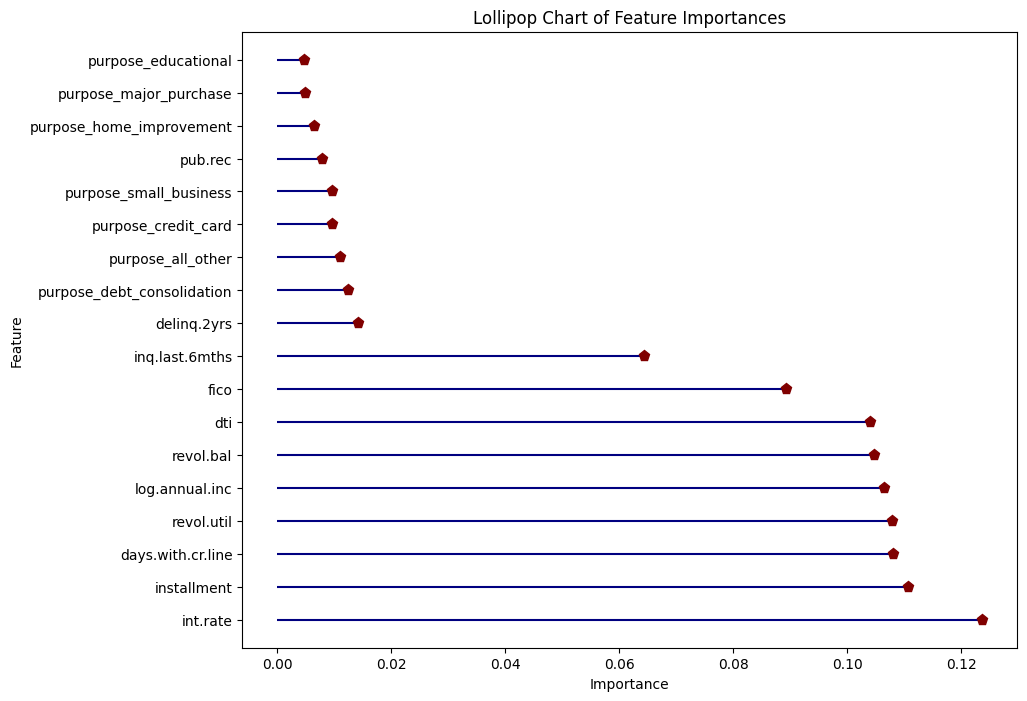

In [ ]:
plt.figure(figsize=(10, 8))

plt.hlines(y=importances_df_descending['feature'],
    xmin=0,
    xmax=importances_df_descending['importance'], color = "navy"
)

plt.plot(
    importances_df_descending['importance'],
    importances_df_descending['feature'], "p", markersize=8,
    color="maroon"
)

plt.title("Lollipop Chart of Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Decision Tree

# Task
Compare the performance of the Logistic Regression model (`model2`) and the Random Forest model (`rf`) by calculating the precision, recall for class 1, accuracy, and ROC AUC score for each. Then, generate a bar chart visualizing these metrics for both models, followed by a summary of their performance differences and strengths.

## Calculate Logistic Regression Metrics

### Subtask:
Calculate the precision, recall for class 1, accuracy, and ROC AUC score for the Logistic Regression model (`model2`). This will involve using `classification_report` and `roc_auc_score` with `y_test` and the model's predictions and probabilities on `X_test_scaled`.


**Reasoning**:
The subtask requires calculating and printing precision, recall (for class 1), accuracy, and ROC AUC score for the Logistic Regression model (`model2`). This involves making predictions, calculating probabilities, generating a classification report, and then extracting/calculating the specified metrics.



In [ ]:
y_pred_lr = model2.predict(X_test_scaled)
y_prob_lr = model2.predict_proba(X_test_scaled)[:, 1]

lr_report = metrics.classification_report(y_test, y_pred_lr, output_dict=True)

precision_class1_lr = lr_report['1']['precision']
recall_class1_lr = lr_report['1']['recall']
accuracy_lr = lr_report['accuracy']
roc_auc_lr = metrics.roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Model Metrics:")
print(f"  Precision (Class 1): {precision_class1_lr:.4f}")
print(f"  Recall (Class 1): {recall_class1_lr:.4f}")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  ROC AUC Score: {roc_auc_lr:.4f}")

## Calculate Random Forest Metrics

### Subtask:
Calculate the precision, recall for class 1, accuracy, and ROC AUC score for the Random Forest model (`rf`). This will involve using `classification_report` and `roc_auc_score` with `y_test` and the model's predictions and probabilities on `X_test_scaled`.


**Reasoning**:
Calculate the precision, recall (for class 1), accuracy, and ROC AUC score for the Random Forest model, and print these metrics.



In [ ]:
rf_report = metrics.classification_report(y_test, y_pred, output_dict=True)

precision_class1_rf = rf_report['1']['precision']
recall_class1_rf = rf_report['1']['recall']
accuracy_rf = rf_report['accuracy']
roc_auc_rf = metrics.roc_auc_score(y_test, y_prob)

print("Random Forest Model Metrics:")
print(f"  Precision (Class 1): {precision_class1_rf:.4f}")
print(f"  Recall (Class 1): {recall_class1_rf:.4f}")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  ROC AUC Score: {roc_auc_rf:.4f}")